In [ ]:
# PRZETWARZANIE I OCZYSZCZANIE DANYCH:
#Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
#Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
#Pobierz wszystkie linki do tweetów i przekaż je do listy.
#Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
#Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
#Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords.


In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/dane4.csv'
df = pd.read_csv(file_path)
df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Mon Nov 28 16:30:02 +0000 2022,NaN,NaN,NaN,9,1597266579062149122,matipniewski,1.597230e+18,1.401581e+18,...,2,8,0,sraka,sraka,ko_smaty,244,NaN,http://sraka.com,False
1,NaN,Mon Nov 28 20:35:39 +0000 2022,NaN,NaN,NaN,35,1597328388636938241,NaN,NaN,NaN,...,8186,589,162,Polska,PrawyPopulista 🇵🇱🇺🇦,PrawaStronaa,80738,NaN,NaN,False
2,NaN,Mon Nov 28 16:41:28 +0000 2022,NaN,NaN,NaN,0,1597269455020883968,mharger20,1.597269e+18,8.360090e+17,...,102,622,0,NaN,Harger do 047,mharger20,5690,NaN,http://Twich.tv/mharger20,False
3,NaN,Mon Nov 28 19:35:31 +0000 2022,NaN,NaN,NaN,0,1597313255554572289,MussaBabaleo2,1.597312e+18,1.464325e+18,...,281,920,0,Tanzania,Waltz,WaMpembee,1242,NaN,NaN,False
4,NaN,Mon Nov 28 13:24:52 +0000 2022,NaN,NaN,NaN,1,1597219976712433665,elonmusk,1.597171e+18,4.419640e+07,...,34,239,0,NaN,Mark Damasco,realMarkDamasco,875,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,NaN,Sun Nov 20 22:00:01 +0000 2022,ElonMusk twitter,NaN,https://naekranie.pl/lekkie/twitter-kto-odszed...,1,1594450518553739264,NaN,NaN,NaN,...,10766,108,61,Poland,naEKRANIE.pl,naEKRANIEpl,34233,NaN,http://www.naEKRANIE.pl,False
696,NaN,Sun Nov 20 23:02:18 +0000 2022,NaN,NaN,NaN,0,1594466191631843328,dudinha_fritz,1.594457e+18,1.495552e+18,...,367,1146,0,NaN,livinho 🛸,livinhocrf77,9372,NaN,NaN,False
697,NaN,Sun Nov 20 16:14:44 +0000 2022,NaN,NaN,https://twitter.com/everything20233/status/159...,8,1594363622515408901,NaN,NaN,NaN,...,10233,31,122,"Bromley, London",Seb Ross 🇵🇱🇬🇧,SebRoss4,18616,NaN,NaN,False
698,NaN,Sun Nov 20 17:46:46 +0000 2022,NaN,NaN,https://www.cnn.com/2022/11/20/tech/twitter-el...,3,1594386785869893633,NaN,NaN,NaN,...,4475,2263,2,"Italia,Polonia,Svizzera,USA",Ally L.Beal,AllMcBill,27150,NaN,NaN,False


In [ ]:
#Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
days_mapping = { "Mon": "Poniedziałek", "Tue": "Wtorek", "Wed": "Środa","Thu": "Czwartek", "Fri": "Piątek", "Sat": "Sobota", "Sun": "Niedziela"}

df['created_at'] = df['created_at'].replace(days_mapping, regex=True)
print(df[['created_at']].head(21))

                                 created_at
0   Poniedziałek Nov 28 16:30:02 +0000 2022
1   Poniedziałek Nov 28 20:35:39 +0000 2022
2   Poniedziałek Nov 28 16:41:28 +0000 2022
3   Poniedziałek Nov 28 19:35:31 +0000 2022
4   Poniedziałek Nov 28 13:24:52 +0000 2022
5   Poniedziałek Nov 28 18:28:16 +0000 2022
6   Poniedziałek Nov 28 22:01:04 +0000 2022
7   Poniedziałek Nov 28 19:55:09 +0000 2022
8   Poniedziałek Nov 28 11:40:51 +0000 2022
9   Poniedziałek Nov 28 21:53:54 +0000 2022
10        Wtorek Nov 29 07:12:25 +0000 2022
11  Poniedziałek Nov 28 20:05:21 +0000 2022
12        Wtorek Nov 29 06:26:46 +0000 2022
13  Poniedziałek Nov 28 22:34:54 +0000 2022
14  Poniedziałek Nov 28 19:44:03 +0000 2022
15  Poniedziałek Nov 28 12:12:03 +0000 2022
16  Poniedziałek Nov 28 16:58:27 +0000 2022
17  Poniedziałek Nov 28 19:31:32 +0000 2022
18  Poniedziałek Nov 28 18:35:29 +0000 2022
19  Poniedziałek Nov 28 16:35:11 +0000 2022


In [ ]:
#Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
months_mapping = {"Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06", "Jul": "07", "Aug": "08", "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"}

df['created_at'] = df['created_at'].replace(months_mapping, regex=True)
print(df[['created_at']].head(21))

                                created_at
0   Poniedziałek 11 28 16:30:02 +0000 2022
1   Poniedziałek 11 28 20:35:39 +0000 2022
2   Poniedziałek 11 28 16:41:28 +0000 2022
3   Poniedziałek 11 28 19:35:31 +0000 2022
4   Poniedziałek 11 28 13:24:52 +0000 2022
5   Poniedziałek 11 28 18:28:16 +0000 2022
6   Poniedziałek 11 28 22:01:04 +0000 2022
7   Poniedziałek 11 28 19:55:09 +0000 2022
8   Poniedziałek 11 28 11:40:51 +0000 2022
9   Poniedziałek 11 28 21:53:54 +0000 2022
10        Wtorek 11 29 07:12:25 +0000 2022
11  Poniedziałek 11 28 20:05:21 +0000 2022
12        Wtorek 11 29 06:26:46 +0000 2022
13  Poniedziałek 11 28 22:34:54 +0000 2022
14  Poniedziałek 11 28 19:44:03 +0000 2022
15  Poniedziałek 11 28 12:12:03 +0000 2022
16  Poniedziałek 11 28 16:58:27 +0000 2022
17  Poniedziałek 11 28 19:31:32 +0000 2022
18  Poniedziałek 11 28 18:35:29 +0000 2022
19  Poniedziałek 11 28 16:35:11 +0000 2022


In [ ]:
#Pobierz wszystkie linki do tweetów i przekaż je do listy.
tweet_links = df['tweet_url'].tolist()
print(tweet_links[:21])

['https://twitter.com/ko_smaty/status/1597266579062149122', 'https://twitter.com/PrawaStronaa/status/1597328388636938241', 'https://twitter.com/mharger20/status/1597269455020883968', 'https://twitter.com/WaMpembee/status/1597313255554572289', 'https://twitter.com/realMarkDamasco/status/1597219976712433665', 'https://twitter.com/CyberfeedP/status/1597296329838845952', 'https://twitter.com/KRESYPL/status/1597349884230860802', 'https://twitter.com/sbaiesu/status/1597318197937864705', 'https://twitter.com/pjeroshki/status/1597193802942681088', 'https://twitter.com/DragomirSonar/status/1597348081380470787', 'https://twitter.com/MartaSierpinska/status/1597488637934858241', 'https://twitter.com/camarada_diniz/status/1597320762075271168', 'https://twitter.com/kosa64/status/1597477148557660161', 'https://twitter.com/ZbigniewBarszc1/status/1597358397409853440', 'https://twitter.com/CommonSensePL/status/1597315402542956544', 'https://twitter.com/JakubNekio/status/1597201655145332739', 'https://tw

In [ ]:
#Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
tweet_urls = df['urls'].dropna().tolist()
print(tweet_urls[:21])

['https://cyberfeed.pl/elon-musk-sugeruje-ze-apple-nienawidzi-wolnosci-slowa-po-tym-jak-w-wiekszosci-przestal-reklamowac-sie-na-twitterze/', 'https://kresy.pl/?p=853255', 'https://www.pb.pl/musk-apple-w-wiekszosci-przestalo-reklamowac-sie-na-twitterze-1170669', 'https://twitter.com/Casimiro/status/1597267714271498241', 'https://buff.ly/3Vyvldn', 'https://www.disclose.tv/id/1597347894134177792/', 'https://twitter.com/CommonSensePL/status/1597315402542956544', 'https://twitter.com/Astronomiaum/status/1597303683972501505', 'http://bit.ly/3AV1B2n', 'https://www.press.pl/tresc/73941,twitter-podzieli-subskrypcje-na-zlote_-niebieskie-i-szare_-musk-wprowadza-generalna-amnestie', 'https://comparic.pl/apple-i-google-opodatkowaly-internet-elon-musk-i-twitter-chce-isc-na-wojne-z-gigantami/', 'https://twitter.com/musicnewsfactpl/status/1597215827342000129', 'https://twitter.com/ASnowdrops/status/1597295919636320256', 'https://twitter.com/nextlevel_br/status/1597270951531794432', 'https://twitter.co

In [ ]:
#Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
media_links = df['media'].dropna().tolist()
print(media_links[:21])

['https://twitter.com/CommonSensePL/status/1597315402542956544/photo/1', 'https://twitter.com/Andy27812/status/1597285949162999808/photo/1', 'https://twitter.com/ktrelski/status/1597247324857638912/photo/1', 'https://twitter.com/ARNOLD61102750/status/1597221567447957505/photo/1', 'https://twitter.com/musicnewsfactpl/status/1597208558852255744/photo/1', 'https://twitter.com/dawnmaskedindiv/status/1597307706343583744/photo/1', 'https://twitter.com/KotPiotr2/status/1597189740570509315/photo/1', 'https://twitter.com/LechuCzechuTV/status/1597309464696459265/photo/1', 'https://twitter.com/Zyzbyszok/status/1597140076533719042/photo/1', 'https://twitter.com/seiarrotar/status/1596613288192016384/photo/1', 'https://twitter.com/Arek_ZdWola/status/1596610149820424193/photo/1', 'https://twitter.com/MariuszZarycht1/status/1596911109948440576/photo/1', 'https://twitter.com/ePressoNews/status/1597176925419495430/photo/1', 'https://twitter.com/LuksemburgRadek/status/1596913985894617088/photo/1', 'https

In [ ]:
#Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords
polish_stopwords = {
    "a", "aby", "ach", "acz", "aczkolwiek", "aj", "albo", "ale", "alez", "ależ", "ani", "az", "aż",
    "bardziej", "bardzo", "beda", "bedzie", "bez", "deda", "będą", "bede", "będę", "będzie", "bo",
    "bowiem", "by", "byc", "być", "byl", "byla", "byli", "bylo", "byly", "był", "była", "było",
    "były", "bynajmniej", "cala", "cali", "caly", "cała", "cały", "ci", "cie", "ciebie", "cię", "co",
    "cokolwiek", "cos", "coś", "czasami", "czasem", "czemu", "czy", "czyli", "daleko", "dla", "dlaczego",
    "dlatego", "do", "dobrze", "dokad", "dokąd", "dosc", "dość", "duzo", "dużo", "dwa", "dwaj", "dwie",
    "dwoje", "dzis", "dzisiaj", "dziś", "gdy", "gdyby", "gdyz", "gdyż", "gdzie", "gdziekolwiek", "gdzies",
    "gdzieś", "go", "i", "ich", "ile", "im", "inna", "inne", "inny", "innych", "iz", "iż", "ja", "jak",
    "jakas", "jakaś", "jakby", "jaki", "jakichs", "jakichś", "jakie", "jakis", "jakiś", "jakiz", "jakiż",
    "jakkolwiek", "jako", "jakos", "jakoś", "ją", "je", "jeden", "jedna", "jednak", "jednakze", "jednakże",
    "jedno", "jego", "jej", "jemu", "jesli", "jest", "jestem", "jeszcze", "jeśli", "jezeli", "jeżeli",
    "juz", "już", "kazdy", "każdy", "kiedy", "kilka", "kims", "kimś", "kto", "ktokolwiek", "ktora", "ktore",
    "ktorego", "ktorej", "ktory", "ktorych", "ktorym", "ktorzy", "ktos", "ktoś", "która", "które", "którego",
    "której", "który", "których", "którym", "którzy", "ku", "lat", "lecz", "lub", "ma", "mają", "mało", "mam",
    "mi", "miedzy", "między", "mimo", "mna", "mną", "mnie", "moga", "mogą", "moi", "moim", "moj", "moja",
    "moje", "moze", "mozliwe", "mozna", "może", "możliwe", "można", "mój", "mu", "musi", "my", "na", "nad",
    "nam", "nami", "nas", "nasi", "nasz", "nasza", "nasze", "naszego", "naszych", "natomiast", "natychmiast",
    "nawet", "nia", "nią", "nic", "nich", "nie", "niech", "niego", "niej", "niemu", "nigdy", "nim", "nimi",
    "niz", "niż", "no", "o", "obok", "od", "około", "on", "ona", "one", "oni", "ono", "oraz", "oto", "owszem",
    "pan", "pana", "pani", "po", "pod", "podczas", "pomimo", "ponad", "poniewaz", "ponieważ", "powinien",
    "powinna", "powinni", "powinno", "poza", "prawie", "przeciez", "przecież", "przed", "przede", "przedtem",
    "przez", "przy", "roku", "rowniez", "również", "sam", "sama", "są", "sie", "się", "skad", "skąd", "soba",
    "sobą", "sobie", "sposob", "sposób", "swoje", "ta", "tak", "taka", "taki", "takie", "takze", "także", "tam",
    "te", "tego", "tej", "ten", "teraz", "też", "to", "toba", "tobą", "tobie", "totez", "toteż", "totobą",
    "trzeba", "tu", "tutaj", "twoi", "twoim", "twoj", "twoja", "twoje", "twój", "twym", "ty", "tych", "tylko",
    "tym", "u", "w", "wam", "wami", "was", "wasz", "wasza", "wasze", "we", "według", "wiele", "wielu", "więc",
    "więcej", "wlasnie", "właśnie", "wszyscy", "wszystkich", "wszystkie", "wszystkim", "wszystko", "wtedy",
    "wy", "z", "za", "zaden", "zadna", "zadne", "zadnych", "zapewne", "zawsze", "ze", "zeby", "zeznowu", "zł",
    "znow", "znowu", "znów", "zostal", "został", "żaden", "żadna", "żadne", "żadnych", "że", "żeby"
}

def remove_stopwords(text):
    if text and isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in polish_stopwords]
        return " ".join(filtered_words)
    return text


df['text_without_stopwords'] = df['text'].apply(remove_stopwords)
print(df[['text', 'text_without_stopwords']].head(21))

                                                 text  \
0   @matipniewski Wydaje mi się że Twitter to miej...   
1   Apple grozi, że usunie Twittera ze swojego skl...   
2                 Mano do nada o elon musk kkkkkkkkkk   
3              @MussaBabaleo2 kwani we ndio elon musk   
4   @elonmusk What do you mean(wdym elon?, Wdym mu...   
5   Elon Musk sugeruje, że Apple nienawidzi wolnoś...   
6   Elon Musk oskarżył firmę Apple o grożenie zabl...   
7   @LayahHeilpern @elonmusk elon musk(ovski)..? f...   
8      @_widua Może elon musk po prostu zjebał sprawę   
9   MAM W MUZGU NEURALINKA PODSŁUCHUJĄ MOJE SZEPTY...   
10  Znacie pojęcie longtermizm? To nowa koncepcja ...   
11                             Pau no cu do Elon Musk   
12  @Lukasz_1_137 @lukaszkotkowski @przemekspider ...   
13  Drodzy. Nowy właściciel Twittera, Elon Musk, p...   
14  Elon Musk vs Apple!\n\nJak obstawiacie? Komu k...   
15  Elon Musk przejmuje twitera.\nZadanie zaliczen...   
16  @hinatahyulover nie interes

In [ ]:
# EKSPLORACYJNA ANALIZA DANYCH
#Wypisz top5 tweetów z największa liczbą polubień.
#Wypisz top5 tweetów z największa liczbą retweetów.
#Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
#Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).
#Wyświetl tweety użytkownika. który ma najwięcej followersów.
#Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
#Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

In [ ]:
# Top 5 tweetów z największą liczbą polubień
top5_likes = df[df['possibly_sensitive'] == False].nlargest(5, 'favorite_count')
print(top5_likes[['text', 'favorite_count']])

                                                  text  favorite_count
57   Elon Musk pracuje nad zwiększeniem limitu znak...            1442
457  Elon Musk w szafie w siedzibie twittera znalaz...             182
293  Maja Staśko chce, żeby Elon Musk dał jej więce...             134
358  Kto by wygrał - Elon Musk wilkołak czy jeleń T...             108
197  Afroamerykanin Elon Musk potwierdził, że w prz...             106


In [ ]:
# Top 5 tweetów z największą liczbą retweetów
top5_retweets = df[df['possibly_sensitive'] == False].nlargest(5, 'retweet_count')
print(top5_retweets[['text', 'retweet_count']])

                                                  text  retweet_count
55   "Dokumenty Twittera dotyczące tłumienia wolnoś...             32
57   Elon Musk pracuje nad zwiększeniem limitu znak...             30
47   "Opinia publiczna zasługuje na to żeby wiedzie...             27
293  Maja Staśko chce, żeby Elon Musk dał jej więce...             21
457  Elon Musk w szafie w siedzibie twittera znalaz...             14


In [ ]:
#Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
nonsensitive_tweets = df[df['possibly_sensitive'] == False]
print(nonsensitive_tweets[['text']].head(21))

                                                 text
5   Elon Musk sugeruje, że Apple nienawidzi wolnoś...
6   Elon Musk oskarżył firmę Apple o grożenie zabl...
14  Elon Musk vs Apple!\n\nJak obstawiacie? Komu k...
17  Elon Musk przekazał, że Apple ograniczyło swoj...
19     PAU NO CU DO ELON MUSK https://t.co/MUpIHeQxiz
21  @jack__sparrow5 @DominikaLasota1 Wystarczy poł...
22  Apple grozi wyrzuceniem Twittera z App Store! ...
24  Elon Musk zapowiada, że ​​wkrótce opublikuje s...
26  Elon Musk odkrył, że Apple bierze 30% od inapp...
28  Pau no cu do Elon Musk 🙏🏽 https://t.co/EaEgNrLPnH
29  Szef Twittera, Elon Musk, mówi, że rozważy stw...
32  Elon Musk o planowanej amnestii kont poinformo...
33  UWAGA!! PO PARU TYGODNIACH BEZ CENZURY ELON MU...
34  - Opinia publiczna zasługuje na to, aby wiedzi...
36  ciekawe co elon musk ma do przekazania ze nie ...
39  Na szczęście ja nie jestem hipokrytą i ocalę w...
41  TOMA NO CU ELON MUSK CHUPA https://t.co/bhVnF2...
42  elon musk to jakiś ekspe

In [ ]:
#Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).

oldest_user = df['user_created_at'].min()
tweets_oldest_user = df[df['user_created_at'] == oldest_user]
print(tweets_oldest_user[['user_screen_name', 'text']])

    user_screen_name                                               text
591       TommyBrain  Byoblu:ELON MUSK ‘RIPRISTINA’ DONALD TRUMP: “V...
642       TommyBrain  Byoblu:ELON MUSK ‘RIPRISTINA’ DONALD TRUMP: “V...


In [ ]:
#Wyświetl tweety użytkownika. który ma najwięcej followersów.

most_followers_user = df.loc[df['user_followers_count'].idxmax()]
tweets_most_followers_user = df[df['user_screen_name'] == most_followers_user['user_screen_name']]
print(tweets_most_followers_user[['user_screen_name', 'text']])

    user_screen_name                                               text
261            tvn24  Miliarder Elon Musk zadeklarował w piątek, kog...
506            tvn24  Elon Musk wykluczył powrót Alexa Jonesa na Twi...


In [ ]:
#Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)

verified_users_tweets = df[df['user_verified'] == True]
print(verified_users_tweets[['user_screen_name', 'text']])

    user_screen_name                                               text
17      puls_biznesu  Elon Musk przekazał, że Apple ograniczyło swoj...
49     przemekspider  To, co dzisiaj wyprawia na Twitterze Elon Musk...
50          tvp_info  Elon Musk udostępnił na Twitterze grafikę, któ...
75          BIPolska  Elon Musk wściekł się, że Apple właściwie wstr...
131         pawelbae  @bo0nkers Bo Elon Musk woli hakować konto TVP ...
137         BIPolska  Od czasu, kiedy Elon Musk przejął Twittera, uż...
140         BIPolska  Jeżeli Apple zdecyduje się usunąć Twittera z A...
209         BIPolska  Elon Musk zaczyna mieszać się w krajową polity...
211   rzeczpospolita  Miliarder mówi, że woli „kogoś rozsądnego i ce...
250         forsalpl  Wybory prezydenckie w USA. Elon Musk poprze re...
255      dziennikarz  Ciekawy tekst o tym co Unia Europejska zrobi, ...
261            tvn24  Miliarder Elon Musk zadeklarował w piątek, kog...
273      bweglarczyk  Elon Musk ogłasza "wielką amnestię" na Twi

In [ ]:
#Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

df['created_at'] = pd.to_datetime(df['created_at'])
df['day_of_week'] = df['created_at'].dt.day_name()
day_counts = df['day_of_week'].value_counts()
most_common_day = day_counts.idxmax()
day_counts, most_common_day


(day_of_week
 Monday       197
 Tuesday      130
 Sunday       108
 Saturday      91
 Friday        68
 Wednesday     55
 Thursday      51
 Name: count, dtype: int64,
 'Monday')

In [ ]:
# PRZETWARZANIE JĘZYKA NATURALNEGO
# Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons
# Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places
# Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

In [ ]:
# Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons
# Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places
# Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

!python -m spacy download pl_core_news_lg
import spacy

  Using cached https://github.com/explosion/spacy-models/releases/download/pl_core_news_lg-3.7.0/pl_core_news_lg-3.7.0-py3-none-any.whl (573.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("pl_core_news_lg")

In [ ]:
with open("/content/dane4.csv", mode = "r", encoding = "utf-8") as file:
  dane = file.read()

In [ ]:
doc = nlp(dane)

names_list = []
places_list = []
organizations_list = []

for _, row in df.iterrows():
    text = row['text']
    doc = nlp(text)
    names = [ent.text for ent in doc.ents if ent.label_ == "persName"]
    places = [ent.text for ent in doc.ents if ent.label_ == "placeName"]
    organizations = [ent.text for ent in doc.ents if ent.label_ == "orgName"]

    names_list.append(names)
    places_list.append(places)
    organizations_list.append(organizations)

df['names'] = names_list
df['places'] = places_list
df['organizations'] = organizations_list
print(df[['names', 'places', 'organizations']])

                            names           places         organizations
0                       [Twitter]  [@matipniewski]                    []
1                     [Elon Musk]               []               [Apple]
2    [Mano, elon musk kkkkkkkkkk]               []                    []
3     [@MussaBabaleo2, elon musk]               []                    []
4                              []               []                    []
..                            ...              ...                   ...
695         [#ElonMusk, #twitter]               []                    []
696                   [Elon Musk]               []                    []
697          [Twitter, Elon Musk]               []        [Konfederacji]
698                  [E., Trumpa]               []  [Musk, CNN Business]
699                   [Elon Musk]               []                    []

[700 rows x 3 columns]


In [ ]:
# ROZWIĄZYWANIE PROBLEMÓW/UMIEJĘTNOŚĆ INTERPRETOWANIA DOKUMENTACJI
# Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia

<ipython-input-41-e2ea53cc6c7c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


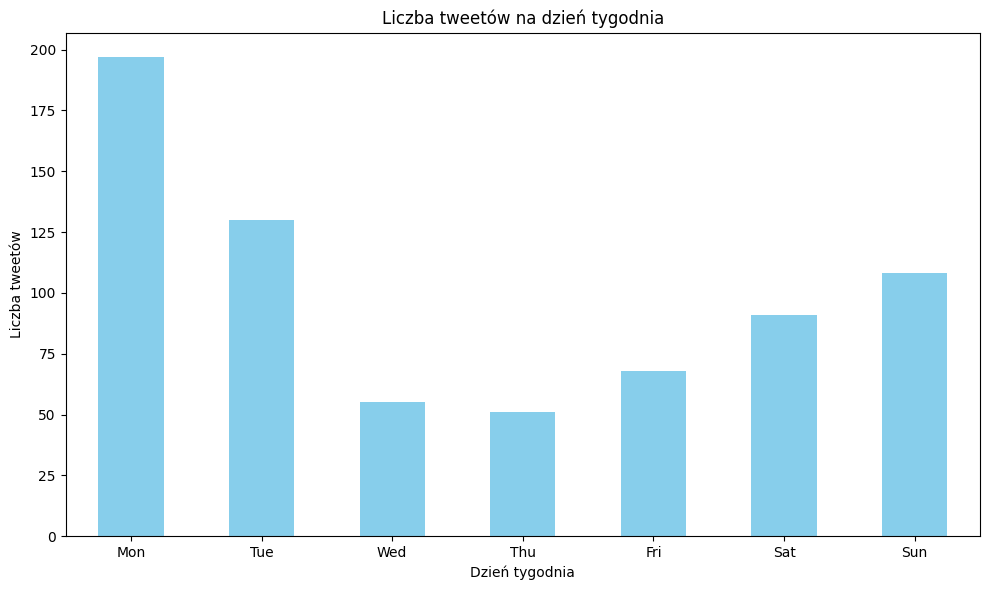

In [ ]:
import matplotlib.pyplot as plt

df['created_at'] = pd.to_datetime(df['created_at'])
df['day_of_week'] = df['created_at'].dt.dayofweek
tweets_per_day = df['day_of_week'].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
tweets_per_day.plot(kind='bar', color='skyblue')
plt.xticks(ticks=range(7), labels=days, rotation=0)
plt.title('Liczba tweetów na dzień tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.tight_layout()
plt.show()